In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Creating folder to save the charts
folder_name = 'images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Read the results.csv file
df = pd.read_csv('../report_results.csv')

time_columns = ["Map1", "Map2", "Shuffle1", "Shuffle2", "Computation", "Reduce1", "Reduce2", "Split", "Synchronization", "Communication"]
metadata_columns = ["Number of nodes", "Amount of data (MB)"]

# Convert the time columns from nanoseconds to s
df[time_columns] = df[time_columns].apply(lambda x: x / 1e9)


# Display the data
df.head()



,Map1,Map2,Shuffle2,Computation,Shuffle1,Reduce1,Split,Synchronization,Reduce2,Communication,Number of nodes,Amount of data (MB)
0,15.412902,0.317677,0.569479,16.790425,1.385357,1.059705,3.747351,0.017384,0.000136,5.702194,1,264.0
1,8.028536,0.211451,0.471798,9.104239,0.924751,0.864097,3.357650,0.022730,0.000158,4.660010,2,264.0
2,5.514397,0.217958,0.414161,6.351678,0.679665,0.654395,3.083034,0.038585,0.000180,4.130203,3,264.0
3,4.398606,0.158924,0.394064,4.875338,0.673856,0.507967,3.112333,0.065692,0.000195,4.162405,4,264.0
4,3.434035,0.450352,0.477614,4.330857,0.595648,0.446358,2.971821,0.055764,0.000153,4.003195,5,264.0


In [5]:
# Adding Total elapsed time (s) column
df['Total elapsed time (s)'] = df['Communication'] + \
    df['Synchronization'] + df['Computation']

# Calculating metric
df['Metric'] = (df['Communication'] + df['Synchronization'])/df['Computation']

df.head()

,Map1,Map2,Shuffle2,Computation,Shuffle1,Reduce1,Split,Synchronization,Reduce2,Communication,Number of nodes,Amount of data (MB),Total elapsed time (s),Metric
0,15.412902,0.317677,0.569479,16.790425,1.385357,1.059705,3.747351,0.017384,0.000136,5.702194,1,264.0,22.510003,0.340645
1,8.028536,0.211451,0.471798,9.104239,0.924751,0.864097,3.357650,0.022730,0.000158,4.660010,2,264.0,13.786979,0.514347
2,5.514397,0.217958,0.414161,6.351678,0.679665,0.654395,3.083034,0.038585,0.000180,4.130203,3,264.0,10.520467,0.656329
3,4.398606,0.158924,0.394064,4.875338,0.673856,0.507967,3.112333,0.065692,0.000195,4.162405,4,264.0,9.103435,0.867242
4,3.434035,0.450352,0.477614,4.330857,0.595648,0.446358,2.971821,0.055764,0.000153,4.003195,5,264.0,8.389816,0.937218


# Fixed Amount of data varying Number of nodes

In [6]:
df_fixed_data = df[df['Amount of data (MB)'] == 264.0]
df_fixed_data.head()

,Map1,Map2,Shuffle2,Computation,Shuffle1,Reduce1,Split,Synchronization,Reduce2,Communication,Number of nodes,Amount of data (MB),Total elapsed time (s),Metric
0,15.412902,0.317677,0.569479,16.790425,1.385357,1.059705,3.747351,0.017384,0.000136,5.702194,1,264.0,22.510003,0.340645
1,8.028536,0.211451,0.471798,9.104239,0.924751,0.864097,3.357650,0.022730,0.000158,4.660010,2,264.0,13.786979,0.514347
2,5.514397,0.217958,0.414161,6.351678,0.679665,0.654395,3.083034,0.038585,0.000180,4.130203,3,264.0,10.520467,0.656329
3,4.398606,0.158924,0.394064,4.875338,0.673856,0.507967,3.112333,0.065692,0.000195,4.162405,4,264.0,9.103435,0.867242
4,3.434035,0.450352,0.477614,4.330857,0.595648,0.446358,2.971821,0.055764,0.000153,4.003195,5,264.0,8.389816,0.937218


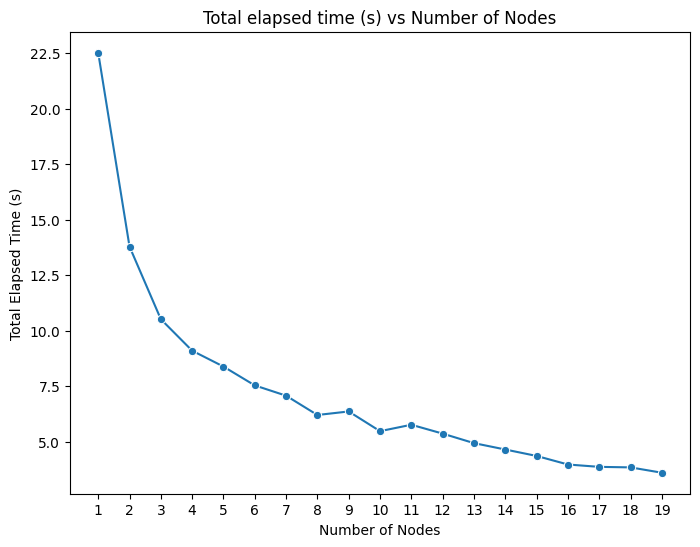

In [7]:
# Plot Total elapsed time vs Number of nodes
plt.figure(figsize=(8, 6))
sns.lineplot(x='Number of nodes', y='Total elapsed time (s)', marker='o', data=df_fixed_data)
plt.title('Total elapsed time (s) vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Total Elapsed Time (s)')
plt.savefig('images/Total_elapsed_time_vs_Number_of_nodes.png')
plt.xticks(df_fixed_data['Number of nodes'])

plt.show()


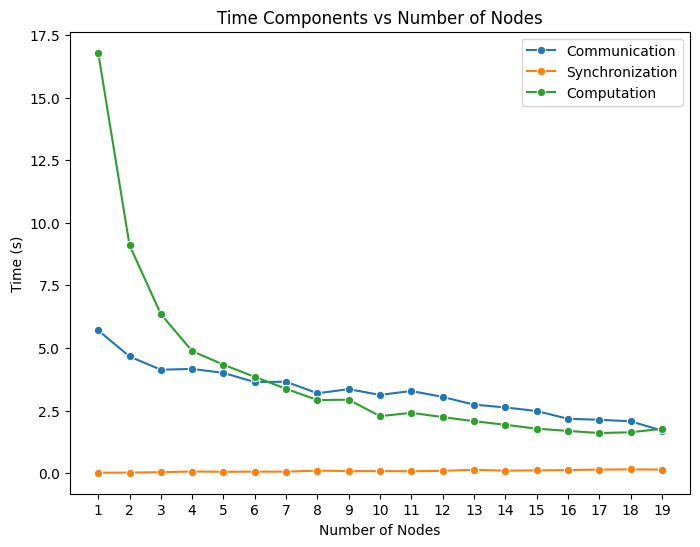

In [8]:
# Plot Communication, Synchronization, and Computation times vs Number of nodes
plt.figure(figsize=(8, 6))
sns.lineplot(x='Number of nodes', y='Communication', marker='o', data=df_fixed_data, label='Communication')
sns.lineplot(x='Number of nodes', y='Synchronization', marker='o', data=df_fixed_data, label='Synchronization')
sns.lineplot(x='Number of nodes', y='Computation', marker='o', data=df_fixed_data, label='Computation')
plt.title('Time Components vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (s)')

# Set integer x labels
plt.xticks(df_fixed_data['Number of nodes'])

plt.legend()
plt.savefig('images/Time_Components_vs_Number_of_Nodes.png')
plt.show()

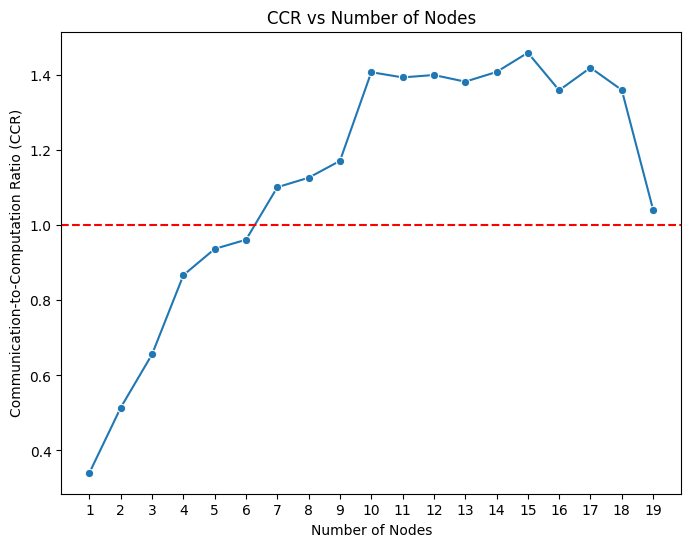

In [9]:
# Plot Metric vs Number of nodes
plt.figure(figsize=(8, 6))
sns.lineplot(x='Number of nodes', y='Metric', marker='o', data=df_fixed_data)
plt.title('CCR vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Communication-to-Computation Ratio (CCR)')
plt.xticks(df_fixed_data['Number of nodes'])

# Add horizontal dashed line at y=1
plt.axhline(y=1, color='red', linestyle='--')

plt.savefig('images/Metric_vs_Number_of_Nodes.png')
plt.show()

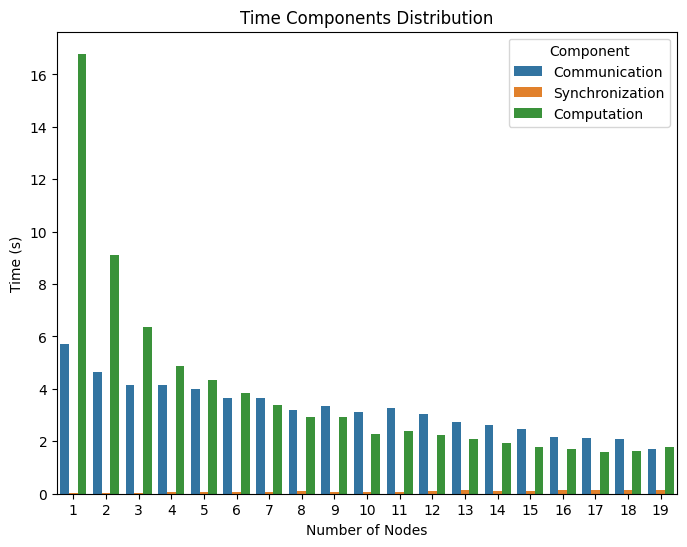

In [10]:
# Plot stacked bar chart for time components
plt.figure(figsize=(8, 6))
df_melted = df_fixed_data.melt(id_vars='Number of nodes', value_vars=['Communication', 'Synchronization', 'Computation'],
      var_name='Component', value_name='Time')
sns.barplot(x='Number of nodes', y='Time', hue='Component', data=df_melted)
plt.title('Time Components Distribution')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (s)')
plt.savefig('images/Time_Components_Distribution.png')
plt.show()


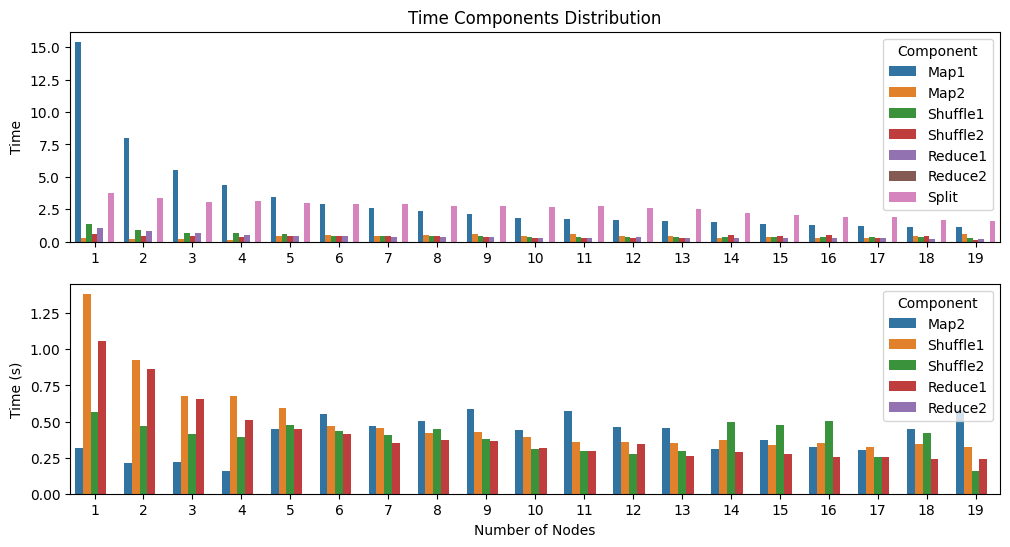

<Figure size 800x600 with 0 Axes>

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

plt.figure(figsize=(8, 6))
df_melted = df_fixed_data.melt(id_vars='Number of nodes', value_vars=["Map1", "Map2", "Shuffle1", "Shuffle2", "Reduce1", "Reduce2", "Split"],
                               var_name='Component', value_name='Time')
sns.barplot(x='Number of nodes', y='Time',
            hue='Component', data=df_melted, ax=axs[0])

df_melted2 = df_fixed_data.melt(id_vars='Number of nodes', value_vars=["Map2", "Shuffle1", "Shuffle2", "Reduce1", "Reduce2"],
                                var_name='Component', value_name='Time')

# Plot the second graph
sns.barplot(x='Number of nodes', y='Time',
            hue='Component', data=df_melted2, ax=axs[1])
axs[0].set_title('Time Components Distribution')
axs[0].set_xlabel('')
axs[1].set_xlabel('Number of Nodes')
axs[1].set_ylabel('Time (s)')

# Show the plots
fig.savefig('images/Time_phases_nodes.png')
plt.show()

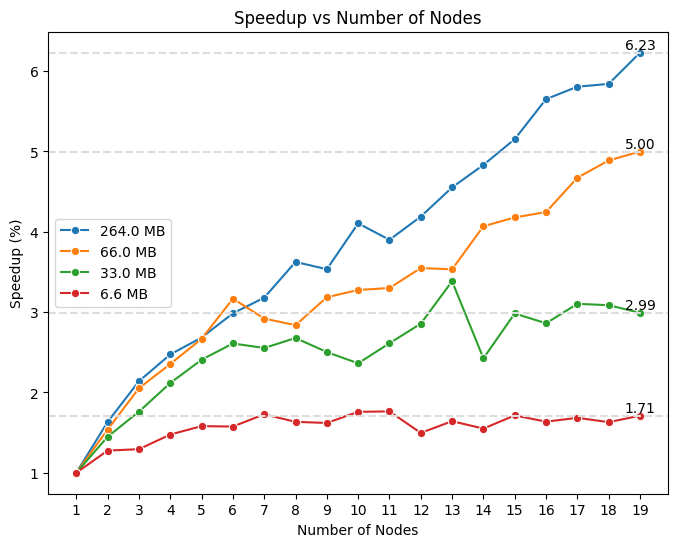

In [12]:
# Calculating speed up
# Getting the time where number of nodes = 1
amounts_of_data = [264.0, 66.0, 33.0, 6.6]
parallel_portions = []
# Plot speed up chart 
plt.figure(figsize=(8, 6))

for amount in amounts_of_data:
    df_data = df[df['Amount of data (MB)'] == amount].copy()
    df_data = df_data.sort_values('Number of nodes')

    seq_time = df_data[df_data['Number of nodes'] == 1]['Total elapsed time (s)'].values[0]
    df_data['Speedup'] = seq_time / df_data['Total elapsed time (s)']
    # df_data['Speedup'] = (seq_time - df_data['Total elapsed time (s)']) / seq_time
    sns.lineplot(x='Number of nodes', y='Speedup', marker='o', data=df_data, label=f'{amount} MB')
    # Draw a light gray dashed line in y axis for the value with highest number of nodes, also display the value in the Y axis
    plt.axhline(y=df_data['Speedup'].values[-1], color='#ddd', linestyle='--')
    plt.text(df_data['Number of nodes'].values[-1], df_data['Speedup'].values[-1], f'{df_data["Speedup"].values[-1]:.2f}', va='bottom', ha='center')
    plt.xticks(df_data['Number of nodes'])

plt.title('Speedup vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup (%)')
plt.legend()
plt.savefig('images/Speedup_vs_Number_of_Nodes.png')
plt.show()

# Fixed number of nodes varying amount of data

In [13]:
df_fixed_nodes = df[df['Number of nodes'] == 6]
df_fixed_nodes.head()

,Map1,Map2,Shuffle2,Computation,Shuffle1,Reduce1,Split,Synchronization,Reduce2,Communication,Number of nodes,Amount of data (MB),Total elapsed time (s),Metric
5,2.878754,0.550483,0.433457,3.844806,0.468801,0.415440,2.920422,0.059983,0.000256,3.637360,6,264.00000,7.542150,0.961646
19,0.754708,0.176802,0.157618,1.056483,0.138794,0.138561,0.747636,0.034463,0.000224,1.021440,6,66.00000,2.112386,0.999451
20,1.372599,0.230923,0.226768,1.667803,0.208999,0.210080,1.382976,0.096092,0.000248,1.771450,6,132.00000,3.535345,1.119762
21,2.237415,0.370818,0.356701,2.599315,0.316487,0.283483,2.187508,0.032555,0.000275,2.806606,6,198.00002,5.438476,1.092273
22,3.632934,0.613479,0.526630,4.178063,0.465451,0.417165,3.557918,0.032475,0.000136,4.485439,6,330.00000,8.695977,1.081342


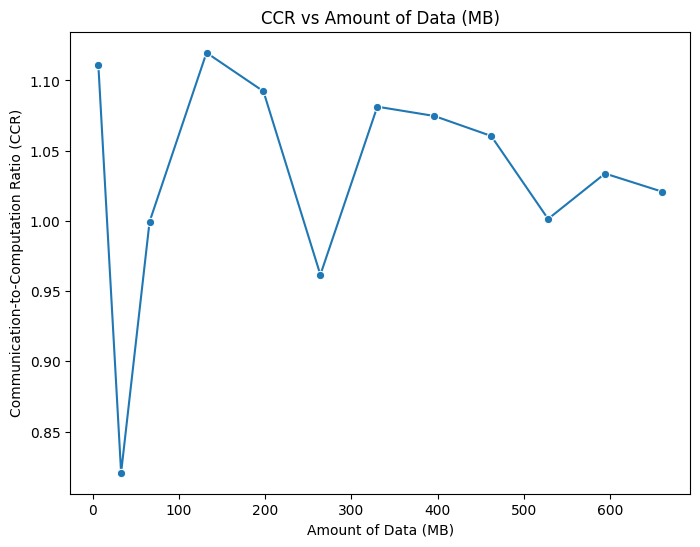

In [14]:
# Plot Metric vs Amount of data (MB)
# Communication-to-Computation Ratio (CCR)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Amount of data (MB)', y='Metric', marker='o', data=df_fixed_nodes)
plt.title('CCR vs Amount of Data (MB)')
plt.xlabel('Amount of Data (MB)')
plt.ylabel('Communication-to-Computation Ratio (CCR)')
plt.savefig('images/Metric_vs_Amount_of_Data.png')
plt.show()

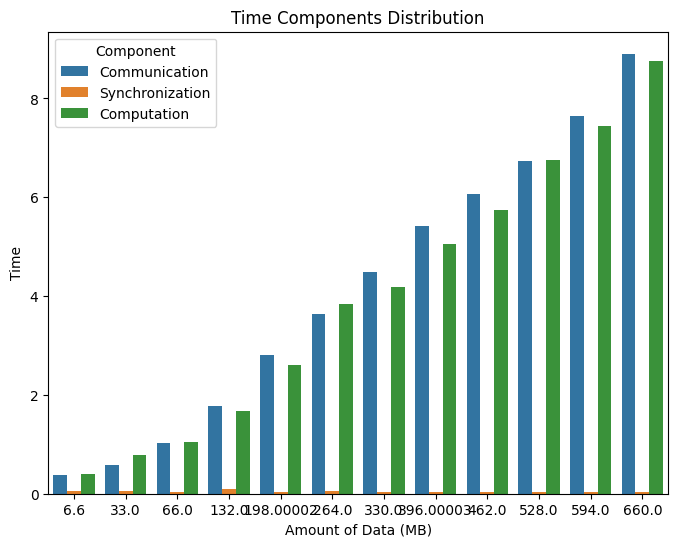

In [15]:
# Plot stacked bar chart for time components
plt.figure(figsize=(8, 6))
df_melted = df_fixed_nodes.melt(id_vars='Amount of data (MB)', value_vars=['Communication', 'Synchronization', 'Computation'],
      var_name='Component', value_name='Time')
sns.barplot(x='Amount of data (MB)', y='Time', hue='Component', data=df_melted)
plt.title('Time Components Distribution')
plt.xlabel('Amount of Data (MB)')
plt.ylabel('Time')
plt.savefig('images/Time_Components_Distribution2.png')     
plt.show()

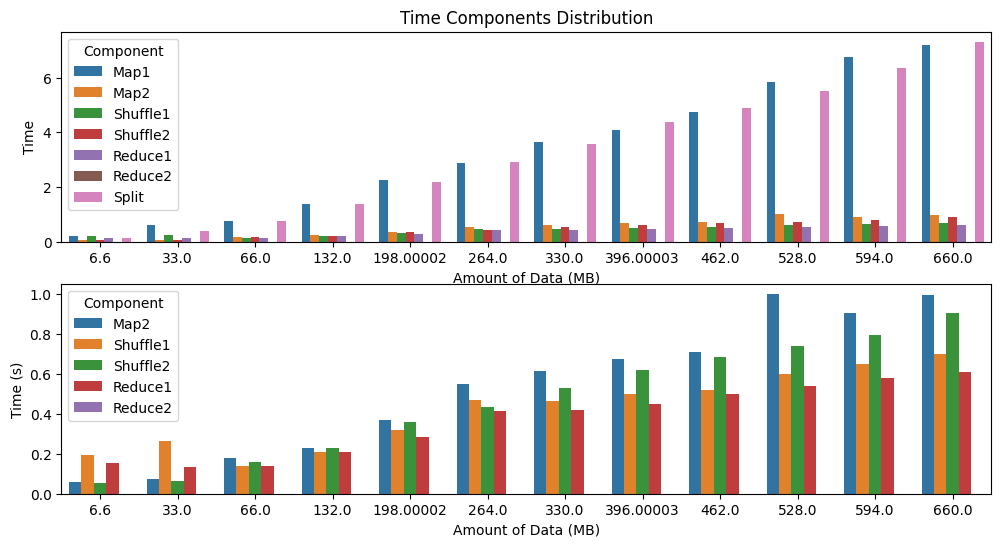

<Figure size 800x600 with 0 Axes>

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

plt.figure(figsize=(8, 6))
df_melted = df_fixed_nodes.melt(id_vars='Amount of data (MB)', value_vars=["Map1", "Map2", "Shuffle1", "Shuffle2", "Reduce1", "Reduce2", "Split"],
                 var_name='Component', value_name='Time')
sns.barplot(x='Amount of data (MB)', y='Time',
      hue='Component', data=df_melted, ax=axs[0])

df_melted2 = df_fixed_nodes.melt(id_vars='Amount of data (MB)', value_vars=["Map2", "Shuffle1", "Shuffle2", "Reduce1", "Reduce2"],
                var_name='Component', value_name='Time')

# Plot the second graph
sns.barplot(x='Amount of data (MB)', y='Time',
      hue='Component', data=df_melted2, ax=axs[1])
axs[0].set_title('Time Components Distribution')
axs[0].set_xlabel('Amount of Data (MB)')
axs[1].set_xlabel('Amount of Data (MB)')
axs[1].set_ylabel('Time (s)')

# Show the plots
fig.savefig('images/Time_phases_data.png')
plt.show()

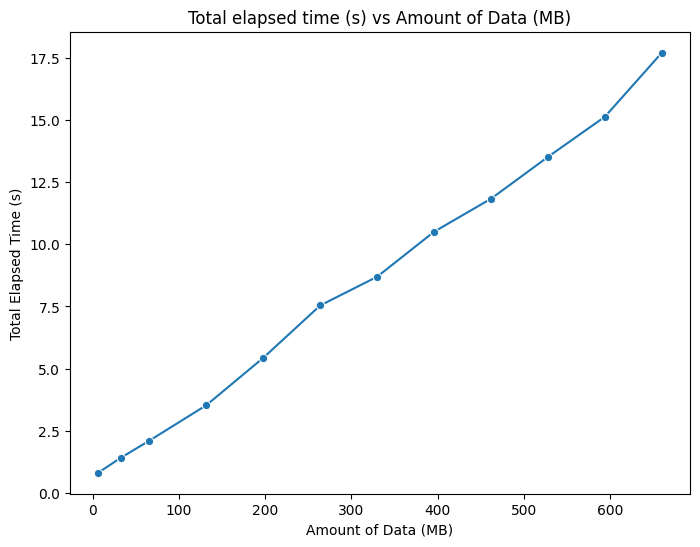

In [17]:
# Plot Total elapsed time vs Number of nodes
plt.figure(figsize=(8, 6))
sns.lineplot(x='Amount of data (MB)', y='Total elapsed time (s)', marker='o', data=df_fixed_nodes)
plt.title('Total elapsed time (s) vs Amount of Data (MB)')
plt.xlabel('Amount of Data (MB)')
plt.ylabel('Total Elapsed Time (s)')
plt.savefig('images/Total_elapsed_time_vs_Amount_of_data.png')
plt.show()
